<a href="https://colab.research.google.com/github/ParisaKalaki/Marketing-Campaign/blob/main/marketing_campaigns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment Notebook**



---
## 0. Setup Environment

In [ ]:
import os
import sys
from pathlib import Path

COURSE = "36106"
ASSIGNMENT = "AT1"

asgmt_path = f"/"
root_path = "./"

print("###### Install required Python packages ######")
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

if os.getenv("COLAB_RELEASE_TAG"):

    from google.colab import drive
    from pathlib import Path

    print("\n###### Connect to personal Google Drive ######")
    gdrive_path = "/content/gdrive"
    drive.mount(gdrive_path)
    root_path = f"{gdrive_path}/MyDrive/Colab Notebooks/Statistical Thinking Of Data Science"

print("\n###### Setting up folders ######")
folder_path = Path(f"{root_path}/{asgmt_path}/")
folder_path.mkdir(parents=True, exist_ok=True)
print(f"\nYou can now save your data files in: {folder_path}")

if os.getenv("COLAB_RELEASE_TAG"):
    %cd {folder_path}


###### Install required Python packages ######

###### Connect to personal Google Drive ######
Mounted at /content/gdrive

###### Setting up folders ######

You can now save your data files in: /content/gdrive/MyDrive/Colab Notebooks/Statistical Thinking Of Data Science
/content/gdrive/MyDrive/Colab Notebooks/Statistical Thinking Of Data Science


### 0.b Disable Warnings Messages


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 0.c Install Additional Packages

> If you are using additional packages, you need to install them here using the command: `! pip install <package_name>`

In [ ]:
pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 13.4 MB/s eta 0:00:00


### 0.d Import Packages

In [ ]:
import numpy as np
import pandas as pd
import altair as alt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import ipywidgets as widgets
from scipy.stats import skew
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline



---
## A. Project Description


In [ ]:
# @title Student Information
wgt_student_name = widgets.Text(
    value=None,
    placeholder='Parisasadat Kalaki',
    description='Student Name:',
    style={'description_width': 'initial'},
    disabled=False
)

wgt_student_id = widgets.Text(
    value=None,
    placeholder='25969686',
    description='Student Id:',
    style={'description_width': 'initial'},
    disabled=False
)

widgets.HBox([wgt_student_name, wgt_student_id])

In [ ]:
# @title Business Objective

wgt_business_objective = widgets.Textarea(
    value=None,
    placeholder='To identify the key factors that influence whether a client subscribes to a telecom plan, so the company can improve its marketing, targeting, and customer acquisition strategies.',
    description='Business Objective:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_business_objective

Textarea(value='', description='Business Objective:', layout=Layout(height='100%', width='auto'), placeholder=…

---
## B. Experiment Description

In [ ]:
# @title Experiment Hypothesis

wgt_experiment_hypothesis = widgets.Textarea(
    value=None,
    placeholder='A logistic regression model can effectively capture the linear relationships between features and the probability of subscription.\nXGBoost can model complex, nonlinear interactions between variables and provide better predictive performance than logistic regression.',
    description='Experiment Hypothesis:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_experiment_hypothesis

Textarea(value='', description='Experiment Hypothesis:', layout=Layout(height='100%', width='auto'), placehold…

In [ ]:

# @title Experiment Expectations

wgt_experiment_expectations = widgets.Textarea(
    value=None,
    placeholder='Logistic regression will give interpretable coefficients showing the direction and strength of feature impact. However, it may underperform in accuracy compared to more complex models if the data has nonlinear patterns or interactions./nXGBoost is expected to achieve higher accuracy, precision, and recall due to its ability to handle nonlinearity and feature interactions. However, it may be less interpretable unless SHAP values or feature importance methods are used.',
    description='Experiment Expectations:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_experiment_expectations

Textarea(value='', description='Experiment Expectations:', layout=Layout(height='100%', width='auto'), placeho…

---
## C. Data Understanding

### C.1   Load Datasets

In [ ]:
# Load dataset
data = pd.read_csv(folder_path / 'TeleCom_Data_edited.csv')

### C.2 Explore Dataset


In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
data.shape

(41180, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41180 non-null  int64  
 1   job             41180 non-null  object 
 2   marital         41180 non-null  object 
 3   education       41180 non-null  object 
 4   default         41180 non-null  object 
 5   housing         41180 non-null  object 
 6   loan            41180 non-null  object 
 7   contact         41180 non-null  object 
 8   month           41180 non-null  object 
 9   day_of_week     41180 non-null  object 
 10  duration        41180 non-null  int64  
 11  campaign        41180 non-null  int64  
 12  pdays           41180 non-null  int64  
 13  previous        41180 non-null  int64  
 14  poutcome        41180 non-null  object 
 15  emp.var.rate    41180 non-null  float64
 16  cons.price.idx  41180 non-null  float64
 17  cons.conf.idx   41180 non-null 

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000
mean,40.021710,258.280427,2.567800,962.516707,0.172705,0.081901,93.575508,-40.501999,3.621422,5167.053344
std,10.419593,259.299856,2.770225,186.809028,0.493719,1.571037,0.578762,4.627358,1.734385,72.230334
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### C.5 Explore Target Variable


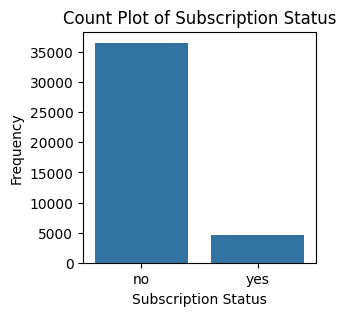

In [ ]:

# 1. Count Plot (for categorical y variable)
plt.figure(figsize=(3,3))
sns.countplot(x=data['y'])
plt.title('Count Plot of Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Frequency')

plt.show()
#df['y_encoded'] = df['y'].map({'no': 0, 'yes': 1})


In [ ]:
# @title Target Variable Insights

wgt_eda_target_variable_insights = widgets.Textarea(
    value=None,
    placeholder='The target is binary and imbalanced.',
    description='Target Variable Insights:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_eda_target_variable_insights

Textarea(value='', description='Target Variable Insights:', layout=Layout(height='100%', width='auto'), placeh…

### C.6 Explore Feature of Interest

In [ ]:
categorical_features = data.select_dtypes(include=['object']).columns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
print("Categorical Features:")
print(categorical_features)
print("\nNumerical Features:")
print(numerical_features)

Categorical Features:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

Numerical Features:
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


### 1. Categorical features

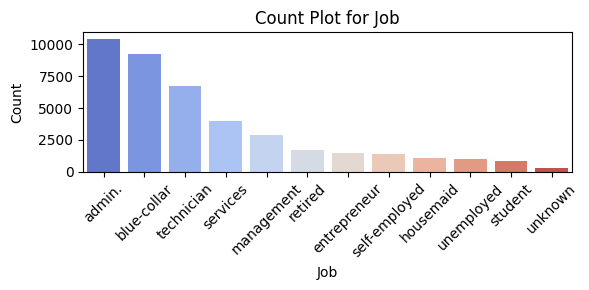

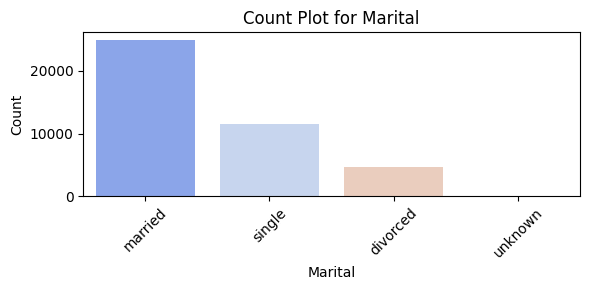

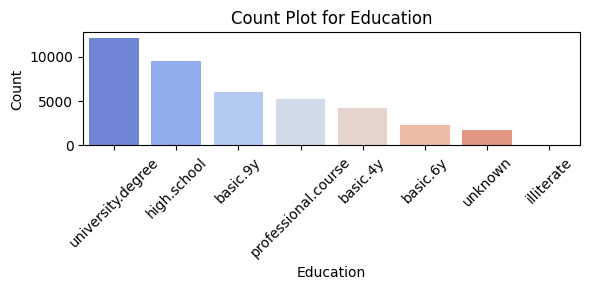

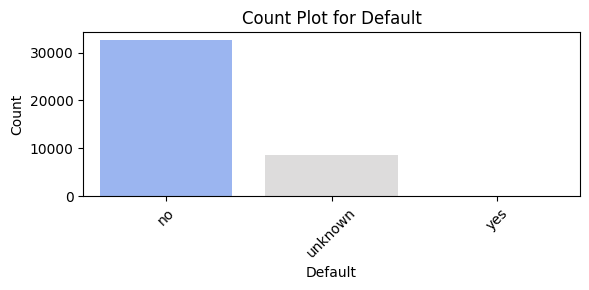

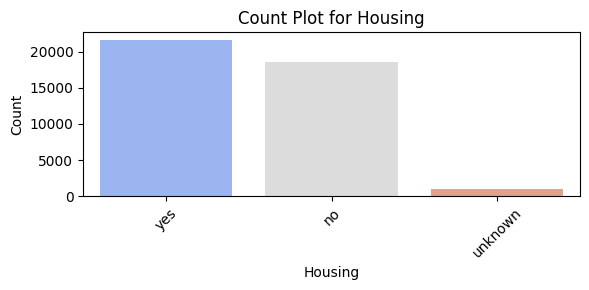

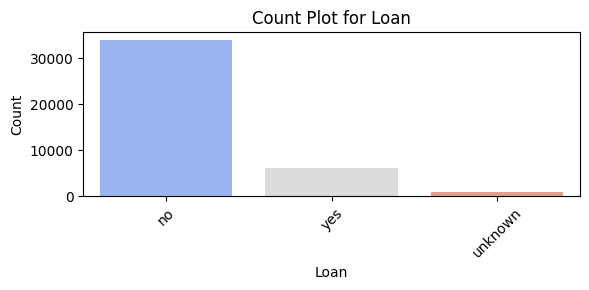

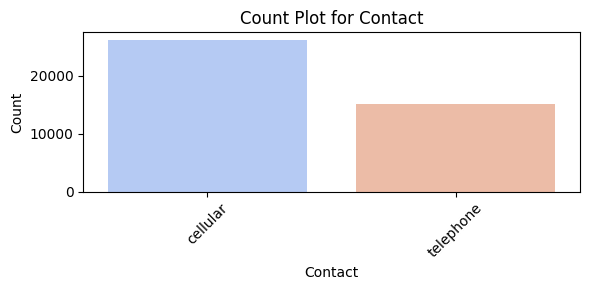

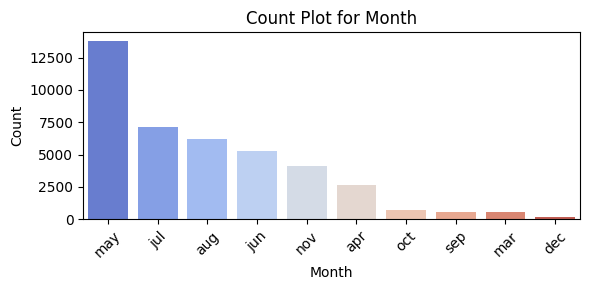

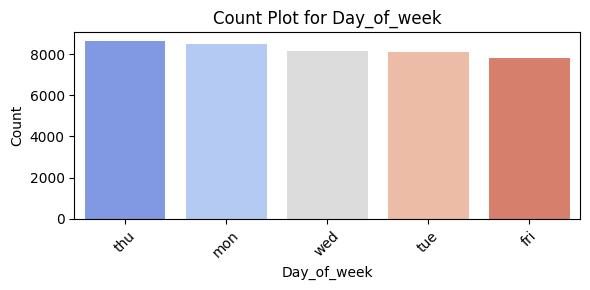

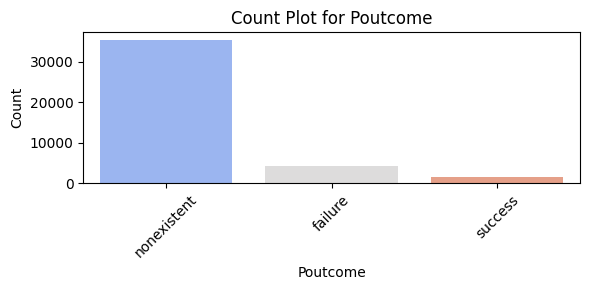

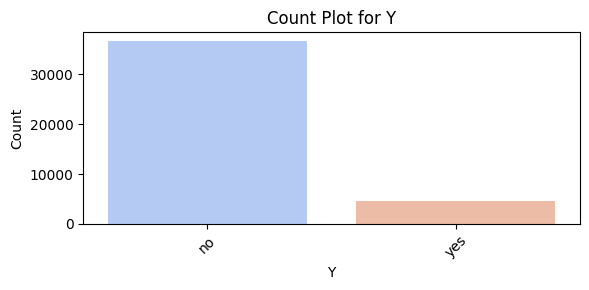

In [ ]:
# Plot the 'job'
for col in categorical_features:
    plt.figure(figsize=(6, 3))
    order = data[col].value_counts().index  # Sort by count
    sns.countplot(x=col, data=data, palette='coolwarm', order=order)
    plt.title(f'Count Plot for {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 2. Numerical features

In [ ]:
discrete_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate']
continuous_cols =['cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


#### Plot discrete features (use bar plot)

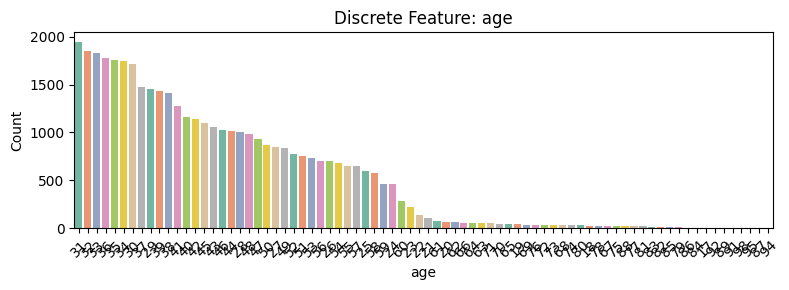

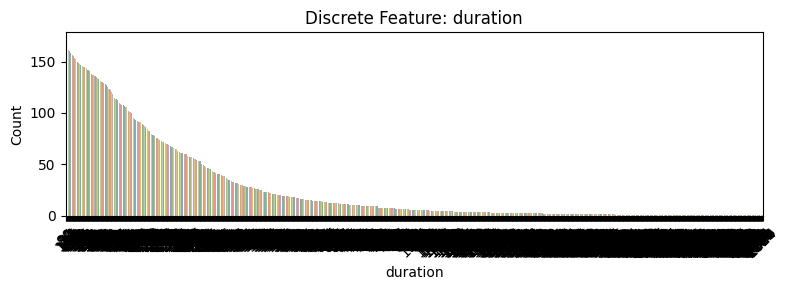

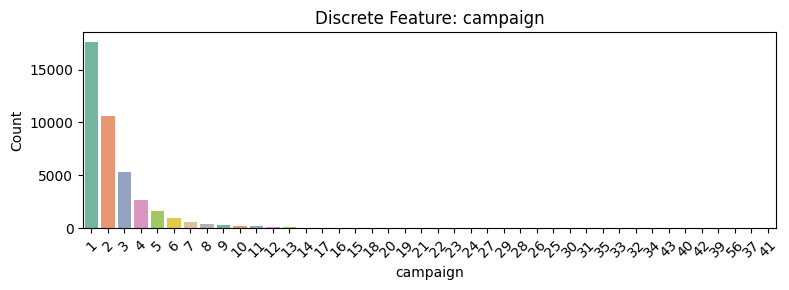

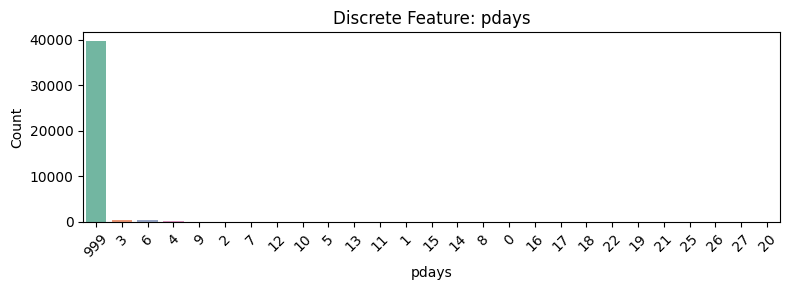

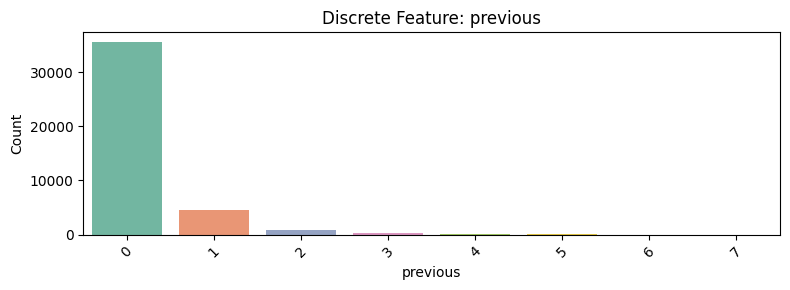

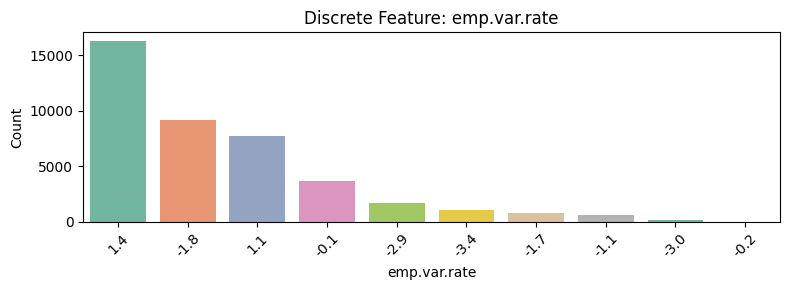

In [ ]:
for col in discrete_cols:
    plt.figure(figsize=(8, 3))
    sns.countplot(x=col, data=data, palette='Set2', order=data[col].value_counts().index)
    plt.title(f'Discrete Feature: {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#### Plot discrete features (use bar plot)

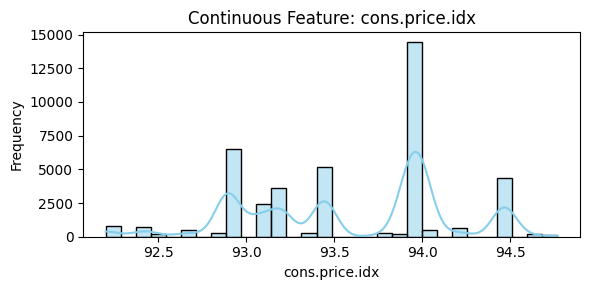

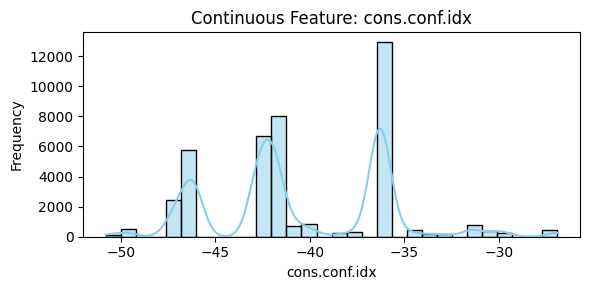

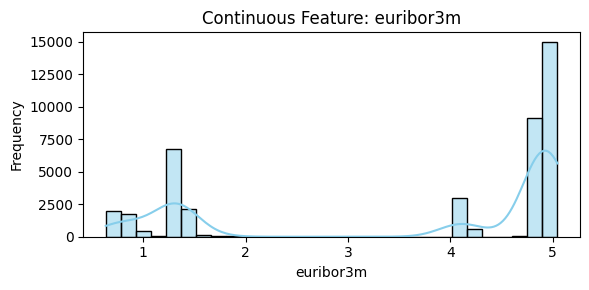

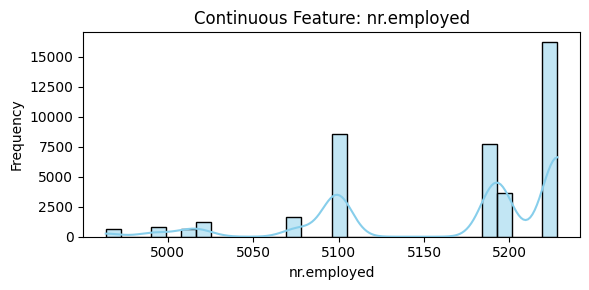

In [ ]:
for col in continuous_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(data[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Continuous Feature: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


In [ ]:
# @title Feature Insights

wgt_eda_feature_insights = widgets.Textarea(
    value=None,
    placeholder='The age variable has a wide range, is skewed(likely right-skewed), and contains some outliers at the extreme ends.',
    description='Age variable Insights:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)

wgt_eda_feature_insights

Textarea(value='', description='Age variable Insights:', layout=Layout(height='100%', width='auto'), placehold…

In [ ]:
wgt_eda_feature_insights = widgets.Textarea(
    value=None,
    placeholder='Most clients were contacted between 1 to 5 times, and the distribution of the campaign variable is right-skewed, indicating that only a few clients received a high number of contacts.',
    description='Campaign variable Insights:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)

wgt_eda_feature_insights

Textarea(value='', description='Campaign variable Insights:', layout=Layout(height='100%', width='auto'), plac…

In [ ]:
wgt_eda_feature_insights = widgets.Textarea(
    value=None,
    placeholder='The duration variable has a wide range, is right-skewed, with most values being short calls, and it may need to be removed as it could highly influence the output due to its extreme values.',
    description='duration variable Insights:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)

wgt_eda_feature_insights

Textarea(value='', description='duration variable Insights:', layout=Layout(height='100%', width='auto'), plac…

In [ ]:
wgt_eda_feature_insights = widgets.Textarea(
    value=None,
    placeholder='pdays is right-skewed; 999 likely means "never contacted".',
    description='pdays variable Insights:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)

wgt_eda_feature_insights

Textarea(value='', description='pdays variable Insights:', layout=Layout(height='100%', width='auto'), placeho…

---
## D. Feature Selection


### D.1 Approach 1: Chi-squared test for categorical variables

In [ ]:
# chi-square test
from scipy.stats import chi2_contingency

print("\n🔍 **Chi-Square Test Results:**\n")
for var in categorical_features:
    contingency_table = pd.crosstab(data[var], data['y'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{var}: p-value = {p:.5f}")
    if p < 0.05:
        print("   ✅ Significant association with y")
    else:
        print("   ❌ No significant association with y")




🔍 **Chi-Square Test Results:**

job: p-value = 0.00000
   ✅ Significant association with y
marital: p-value = 0.00000
   ✅ Significant association with y
education: p-value = 0.00000
   ✅ Significant association with y
default: p-value = 0.00000
   ✅ Significant association with y
housing: p-value = 0.05764
   ❌ No significant association with y
loan: p-value = 0.58599
   ❌ No significant association with y
contact: p-value = 0.00000
   ✅ Significant association with y
month: p-value = 0.00000
   ✅ Significant association with y
day_of_week: p-value = 0.00003
   ✅ Significant association with y
poutcome: p-value = 0.00000
   ✅ Significant association with y
y: p-value = 0.00000
   ✅ Significant association with y


In [ ]:
data_feature_selection = data.copy()
data_feature_selection['has_loan'] = data_feature_selection.apply(lambda row: 'yes' if row['housing'] == 'yes' or row['loan'] == 'yes' else 'no', axis=1)


In [ ]:
# @title Feature Selection 1 Insights

wgt_feat_selection_1_insights = widgets.Textarea(
    value=None,
    placeholder='the loan and housing features are not significant association with y, so we combine them to create a new feature called has_loan.',
    description='Feature Selection 1:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_feat_selection_1_insights

Textarea(value='', description='Feature Selection 1:', layout=Layout(height='100%', width='auto'), placeholder…

### D.2 Approach 2: Correlation matrix for numerical variables

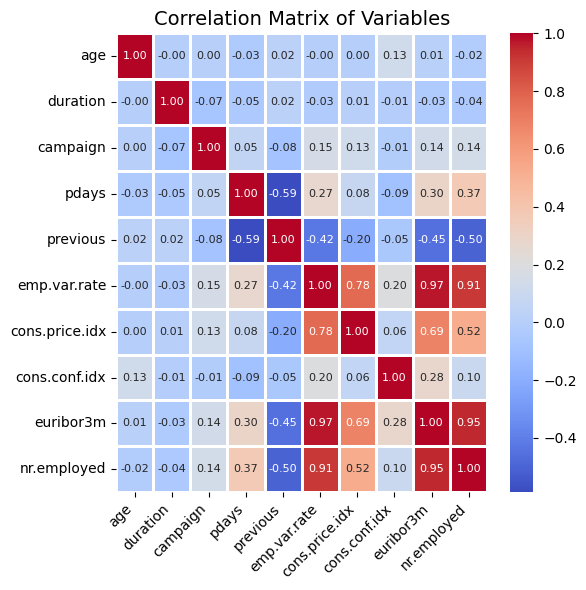

Pairs with correlation > 0.8:
emp.var.rate vs euribor3m: 0.97
emp.var.rate vs nr.employed: 0.91
euribor3m vs emp.var.rate: 0.97
euribor3m vs nr.employed: 0.95
nr.employed vs emp.var.rate: 0.91
nr.employed vs euribor3m: 0.95


In [ ]:
# correlation
correlation_matrix = data_feature_selection[numerical_features].corr()

plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=1,
            annot_kws={"size": 8})
plt.title("Correlation Matrix of Variables", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig('correlation_matrix_final.svg', format='svg')
plt.show()


# Identify pairs with correlation > 0.8
high_corr_pairs = []

for col1 in data_feature_selection[numerical_features].columns:
    for col2 in data_feature_selection[numerical_features].columns:
        if col1 != col2 and correlation_matrix.loc[col1, col2] > 0.8:
            high_corr_pairs.append((col1, col2, correlation_matrix.loc[col1, col2]))

print("Pairs with correlation > 0.8:")
for pair in high_corr_pairs:
    print(f"{pair[0]} vs {pair[1]}: {pair[2]:.2f}")



## D.3 Final Selection of Features

> Save the names of selected features into a list called `features_list`

In [ ]:
data_feature_selection = data_feature_selection.drop(['housing', 'loan'], axis=1)


In [ ]:
data_feature_selection.columns

Index(['age', 'job', 'marital', 'education', 'default', 'contact', 'month',
       'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'has_loan'],
      dtype='object')

In [ ]:
features_list = data_feature_selection.columns

---
## E. Data Cleaning

### E.1 Copy Datasets

> Create copies of the datasets and called them `training_df_clean`, `validation_df_clean` and `testing_df_clean`


In [ ]:
# Create copy of datasets
data_clean = data_feature_selection[features_list].copy()

In [ ]:
data_clean.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
contact,0
month,0
day_of_week,0
duration,0
campaign,0


In [ ]:
data_clean.duplicated().sum()


np.int64(14)

In [ ]:
duplicates = data[data.duplicated(keep=False)]

### E.2 Removing "duplicates"

> There are 14 duplicates rows and we remove them.


In [ ]:
# check duplicates
duplicates = data_clean.duplicated()

print("Number of duplicate rows: ", duplicates.sum())
data_clean_no_duplicates = data_clean.drop_duplicates()

print("Number of duplicate rows after removal: ", data_clean_no_duplicates.duplicated().sum())


Number of duplicate rows:  14
Number of duplicate rows after removal:  0


### E.3 Fixing "replacing nonexistent value in poutcome"

> nonexistent value in the poutcome variable is meaningless. poutcome shows the outcome of the previous compaign, it is  successful, failure and nonexistent. Since the nonexistent values has 0 previous contacts(based on the previous variable) so we replace this value in the poutcome with No_Previous_Contact.


In [ ]:
nonexistent_data = data_clean[data_clean['poutcome'] == 'nonexistent']
nonexistent_data['previous']

,previous
0,0
1,0
2,0
3,0
4,0
...,...
41174,0
41176,0
41177,0
41178,0


In [ ]:
data_clean['poutcome'] = data_clean['poutcome'].replace('nonexistent', 'No_Previous_Contact')

### E.3 replacing yes values in defalut"

> Since there are only 3 yes in the defaukt we replace it with unknwon.


In [ ]:
data_clean['default'] = data_clean['default'].replace({'yes': 'unknown'})


---
## F. Feature Engineering

### F.1 Copy Datasets

> Create copies of the datasets and called them `training_df_eng`, `validation_df_eng` and `testing_df_eng`

In [ ]:
# Create copy of datasets
data_eng = data_clean.copy()

In [ ]:
data_eng['poutcome'].value_counts()

,count
poutcome,
No_Previous_Contact,35559
failure,4250
success,1371


### F.2 New Feature "campaign_bin"

> Binning the campaign variable into categories like "Few Contacts" and "Many Contacts" helps simplify a skewed numeric feature, making it easier to interpret, reducing noise, and improving model performance and explainability.



In [ ]:
data_clean['campaign'].value_counts()

,count
campaign,
1,17637
2,10568
3,5340
4,2651
5,1599
6,979
7,629
8,400
9,283


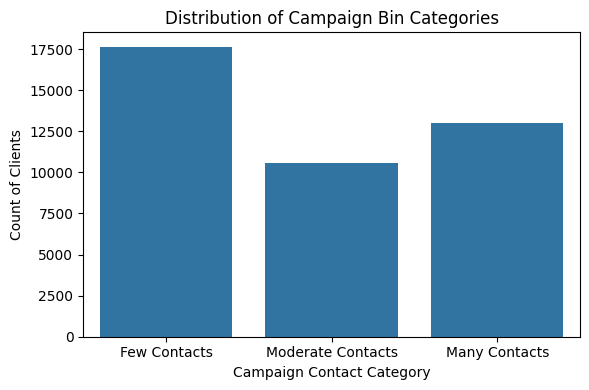

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate quantiles for three bins (tertiles)
Q1_campaign = data_eng['campaign'].quantile(0.33)
Q2_campaign = data_eng['campaign'].quantile(0.66)
min_val_campaign = data_eng['campaign'].min()
max_val_campaign = data_eng['campaign'].max()

# Define bins with three intervals
bins = [min_val_campaign - 1, Q1_campaign, Q2_campaign, max_val_campaign]  # subtract 1 to include min_val_campaign in first bin

# Define labels for the bins (for plotting)
labels = ['Few Contacts', 'Moderate Contacts', 'Many Contacts']

# Create campaign_bin as categorical for plotting
data_eng['campaign_bin_cat'] = pd.cut(data_eng['campaign'], bins=bins, labels=labels, include_lowest=True)

# Plot distribution of the binned 'campaign' values (categorical)
plt.figure(figsize=(6,4))
sns.countplot(x='campaign_bin_cat', data=data_eng, order=labels)
plt.title('Distribution of Campaign Bin Categories')
plt.xlabel('Campaign Contact Category')
plt.ylabel('Count of Clients')
plt.tight_layout()
plt.show()

# Now convert these categorical bins into numeric codes (0, 1, 2)
# This will be your numeric feature for modeling
data_eng['campaign_bin'] = data_eng['campaign_bin_cat'].cat.codes

# Drop campaign and campaign bin cat
data_eng = data_eng.drop('campaign_bin_cat', axis=1)
data_eng = data_eng.drop('campaign', axis=1)


### F.3 New Feature "pdays_bin"

> Since most `pdays` values are 999 (indicating no prior contact), binning helps distinguish between "never contacted" and "recently contacted" clients, making the feature more interpretable and useful for analysis and modeling.




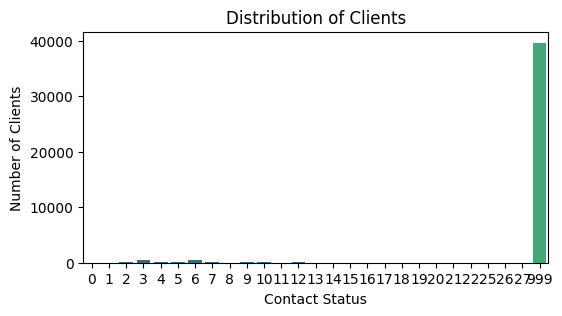

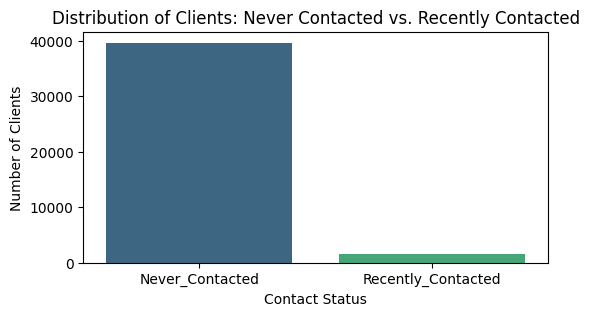

In [ ]:
# Create a new 'pdays_bin' column based on 'pdays' values
data_eng['pdays_bin'] = data_eng['pdays'].apply(lambda x: 'Never_Contacted' if x == 999 else 'Recently_Contacted')

# Plot the distribution with category labels
plt.figure(figsize=(6,3))
sns.countplot(x='pdays', data=data_eng, palette='viridis', hue='pdays_bin', legend=False)
plt.title('Distribution of Clients')
plt.xlabel('Contact Status')
plt.ylabel('Number of Clients')
plt.show()

# Plot the pdays_bin distribution with category labels
plt.figure(figsize=(6,3))
sns.countplot(x='pdays_bin', data=data_eng, palette='viridis', hue='pdays_bin', legend=False)
plt.title('Distribution of Clients: Never Contacted vs. Recently Contacted')
plt.xlabel('Contact Status')
plt.ylabel('Number of Clients')
plt.show()

# Drop the original 'pdays' column if needed
data_eng = data_eng.drop('pdays', axis=1)

### F.3 New Feature "education_group"

> We grouped education levels into "No", "Basic", and "Higher" to make the data easier to understand and help the model learn patterns more clearly.





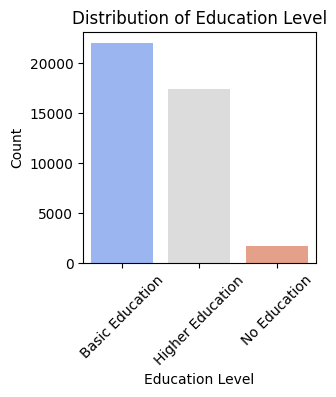

In [ ]:
education_mapping = {
    'unknown': 'No Education',
    'illiterate': 'No Education',
    'basic.4y': 'Basic Education',
    'basic.6y': 'Basic Education',
    'basic.9y': 'Basic Education',
    'high.school': 'Basic Education',
    'professional.course': 'Higher Education',
    'university.degree': 'Higher Education'
}
data_eng['education_group'] = data_eng['education'].map(education_mapping)

# Plot education_group
plt.figure(figsize=(3,3))
sns.countplot(x='education_group', data=data_eng, palette='coolwarm')
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# drop education var
data_eng = data_eng.drop('education', axis=1)


### F.4 New Feature "previous_bin"

> Since the `previous` feature has many zeros indicating no past contacts, binning it into **'No\_Prev\_Contacts'** and **'Has\_Prev\_Contacts'** simplifies interpretation and highlights the impact of prior campaign interactions.




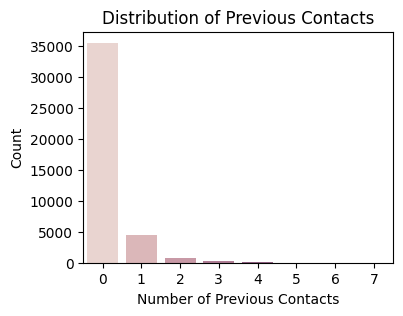

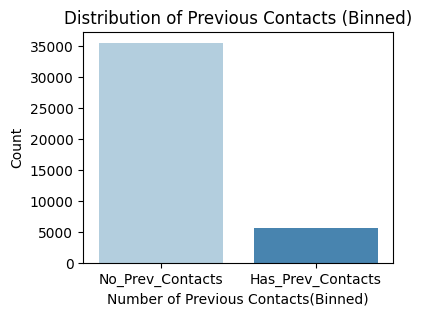

In [ ]:
# plot prevoius variable
plt.figure(figsize=(4,3))
sns.countplot(x='previous', hue='previous', data=data_eng, legend=False)
plt.title('Distribution of Previous Contacts')
plt.xlabel('Number of Previous Contacts')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig('previous_dis.svg', format='svg')
plt.show()

data_eng['previous_bin'] = data_eng['previous'].apply(lambda x: 'No_Prev_Contacts' if x == 0 else 'Has_Prev_Contacts')

# Plot the binned distribution
plt.figure(figsize=(4,3))
sns.countplot(x='previous_bin', data=data_eng, hue='previous_bin', palette='Blues', legend=False)
plt.title('Distribution of Previous Contacts (Binned)')
plt.xlabel('Number of Previous Contacts(Binned)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

data_eng = data_eng.drop('previous', axis=1)

---
## G. Data Preparation for Modeling

> Categorical variables need encoding because some models can only work with numbers. Some categories have a clear order (ordinal) and others don’t (nominal), so we use ordinal encoding for the former and one-hot encoding for the latter. This also helps methods like SMOTE and logistic regression handle the data correctly.


In [ ]:
data_clean['default'].value_counts()

,count
default,
no,32581
unknown,8599


In [ ]:
data_eng['pdays_bin'] = data_eng['pdays_bin'].map({'Never_Contacted': 0, 'Recently_Contacted': 1})
data_eng['previous_bin'] = data_eng['previous_bin'].map({'No_Prev_Contacts': 0, 'Has_Prev_Contacts': 1})
data_eng['y'] = data_eng['y'].map({'no': 0, 'yes': 1})
data_eng['month'] = data_eng['month'].map({'jan': 1, 'feb': 2,'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})
data_eng['day_of_week'] = data_eng['day_of_week'].map({'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5})
data_eng['education_group'] = data_eng['education_group'].map({'No Education': 0, 'Basic Education': 1, 'Higher Education': 2})



In [ ]:
non_ordinal_categorical_cols = ['marital', 'contact', 'default','poutcome', 'has_loan', 'job', 'pdays_bin', 'previous_bin']
data_eng = pd.get_dummies(data_eng, columns=non_ordinal_categorical_cols, drop_first=True)


In [ ]:
data_eng.columns

Index(['age', 'month', 'day_of_week', 'duration', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'campaign_bin', 'education_group', 'marital_married', 'marital_single',
       'marital_unknown', 'contact_telephone', 'default_unknown',
       'poutcome_failure', 'poutcome_success', 'has_loan_yes',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'pdays_bin_1', 'previous_bin_1'],
      dtype='object')

### G.1 Copy Datasets

> Create copies of the datasets and split them into X and y

In [ ]:
from sklearn.model_selection import train_test_split

data_transf = data_eng.copy()

# Step 1: Separate features and target
X = data_transf.drop(columns=['y', 'duration'])
y = data_transf['y']

# Step 2: First split (Train+Val and Test)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Second split (Train and Validation from Train+Val)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.125, random_state=42, stratify=y_temp)
# 0.125 of 80% = 10%

# Sanity check
print(f"Train size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")
print(f"Test size: {len(X_test)}")


Train size: 28826
Validation size: 4118
Test size: 8236


### G.2 Data Transformation: log age

> Log-transforming the highly right-skewed `age` variable reduces the impact of outliers and makes the data more normally distributed, which can improve model performance and stability.



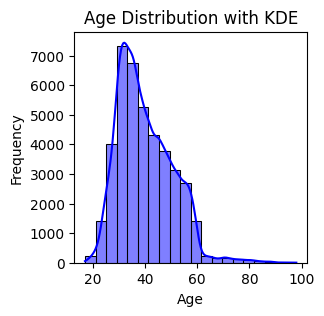

Skewness of age: 0.784588854640852


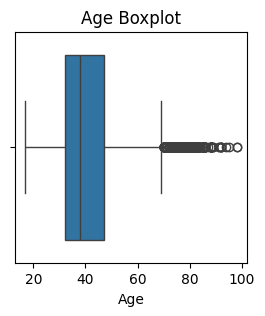

In [ ]:
plt.figure(figsize=(3,3))
sns.histplot(X['age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution with KDE')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

age_skewness = skew(X['age'])
print(f"Skewness of age: {age_skewness}")

# Boxplot to check for outliers of Age
plt.figure(figsize=(3,3))
sns.boxplot(x=X['age'])
plt.title('Age Boxplot')
plt.xlabel('Age')
plt.show()



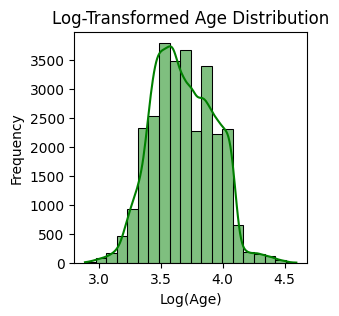

Index(['month', 'day_of_week', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign_bin',
       'education_group', 'marital_married', 'marital_single',
       'marital_unknown', 'contact_telephone', 'default_unknown',
       'poutcome_failure', 'poutcome_success', 'has_loan_yes',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'pdays_bin_1', 'previous_bin_1', 'log_age'],
      dtype='object')


In [ ]:
# STEP 0: Defensive copies
X_train = X_train.copy()
X_val = X_val.copy()
X_test = X_test.copy()

# STEP 1: Log-transform the 'age' column
X_train['log_age'] = np.log1p(X_train['age'])
X_val['log_age'] = np.log1p(X_val['age'])
X_test['log_age'] = np.log1p(X_test['age'])

# STEP 2: Drop the original 'age' column
X_train_final = X_train.drop(columns=['age'])
X_val_final = X_val.drop(columns=['age'])
X_test_final = X_test.drop(columns=['age'])

# STEP 3: Optional histogram (on train only)
plt.figure(figsize=(3, 3))
sns.histplot(X_train_final['log_age'], kde=True, bins=20, color='green')
plt.title('Log-Transformed Age Distribution')
plt.xlabel('Log(Age)')
plt.ylabel('Frequency')
plt.show()

# STEP 4: Check columns
print(X_train_final.columns)


### G.3 PCA

> These features `emp.var.rate`, `nr.employed`, `euribor3m`, `cons.price.idx`, `cons.conf.idx` are all related to economic indicators and likely correlated, applying PCA helps reduce dimensionality by capturing the main economic trends in a few uncorrelated components, simplifying the data while retaining most of the variance and improving model efficiency.


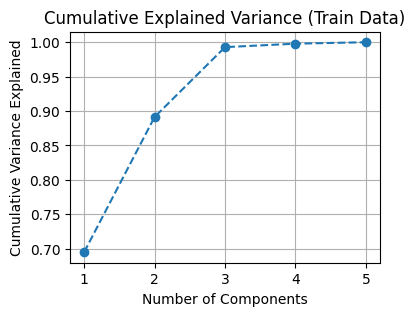

Selected 3 components
Train: (28826, 29)
Val: (4118, 29)
Test: (8236, 29)
                Economic_Trend_1  Economic_Trend_2  Economic_Trend_3
emp.var.rate            0.531356         -0.047887         -0.013743
nr.employed             0.492105         -0.099691         -0.525333
euribor3m               0.529295          0.049348         -0.182389
cons.price.idx          0.421715         -0.190809          0.822872
cons.conf.idx           0.132273          0.974128          0.115984


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define economic features
economic_features = ['emp.var.rate', 'nr.employed', 'euribor3m', 'cons.price.idx', 'cons.conf.idx']

# STEP 1: Build initial pipeline (scale + PCA without limiting components yet)
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA())
])

# STEP 2: Fit pipeline on training economic features
pca_pipeline.fit(X_train_final[economic_features])

# STEP 3: Plot explained variance
explained_variance = pca_pipeline.named_steps['pca'].explained_variance_ratio_

plt.figure(figsize=(4,3))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance (Train Data)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

# STEP 4: Choose number of components to retain 95% variance
threshold = 0.95
n_components = next(i+1 for i, total in enumerate(explained_variance.cumsum()) if total >= threshold)
print(f"Selected {n_components} components")

# STEP 5: Rebuild pipeline with selected number of components
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components))
])
# STEP 6: Fit-transform on train, transform on val and test
X_train_pca = pca_pipeline.fit_transform(X_train_final[economic_features])
X_val_pca = pca_pipeline.transform(X_val_final[economic_features])
X_test_pca = pca_pipeline.transform(X_test_final[economic_features])

# STEP 7: Wrap in DataFrames
pca_cols = [f'Economic_Trend_{i+1}' for i in range(n_components)]
X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_cols, index=X_train_final.index)
X_val_pca_df = pd.DataFrame(X_val_pca, columns=pca_cols, index=X_val_final.index)
X_test_pca_df = pd.DataFrame(X_test_pca, columns=pca_cols, index=X_test_final.index)

# STEP 8: Drop original economic features and replace with PCA features
X_train_final = pd.concat([
    X_train_final.drop(columns=economic_features),
    X_train_pca_df
], axis=1)

X_val_final = pd.concat([
    X_val_final.drop(columns=economic_features),
    X_val_pca_df
], axis=1)

X_test_final = pd.concat([
    X_test_final.drop(columns=economic_features),
    X_test_pca_df
], axis=1)

# STEP 9: Sanity check
print("Train:", X_train_final.shape)
print("Val:", X_val_final.shape)
print("Test:", X_test_final.shape)
# Extract PCA component loadings (weights)
loadings = pca_pipeline.named_steps['pca'].components_

# Create a DataFrame for easier reading
loading_df = pd.DataFrame(loadings.T, index=economic_features,
                          columns=[f'Economic_Trend_{i+1}' for i in range(loadings.shape[0])])

print(loading_df)


> Economic_Trend_1 reflects overall economic activity combining employment, interest rates, and price levels.

> Economic_Trend_2 captures consumer confidence largely independent of other economic factors.

> Economic_Trend_3 represents the trade-off between inflation (consumer prices) and employment levels.

### G.4 Correlation matrix to avoid multicollinearity

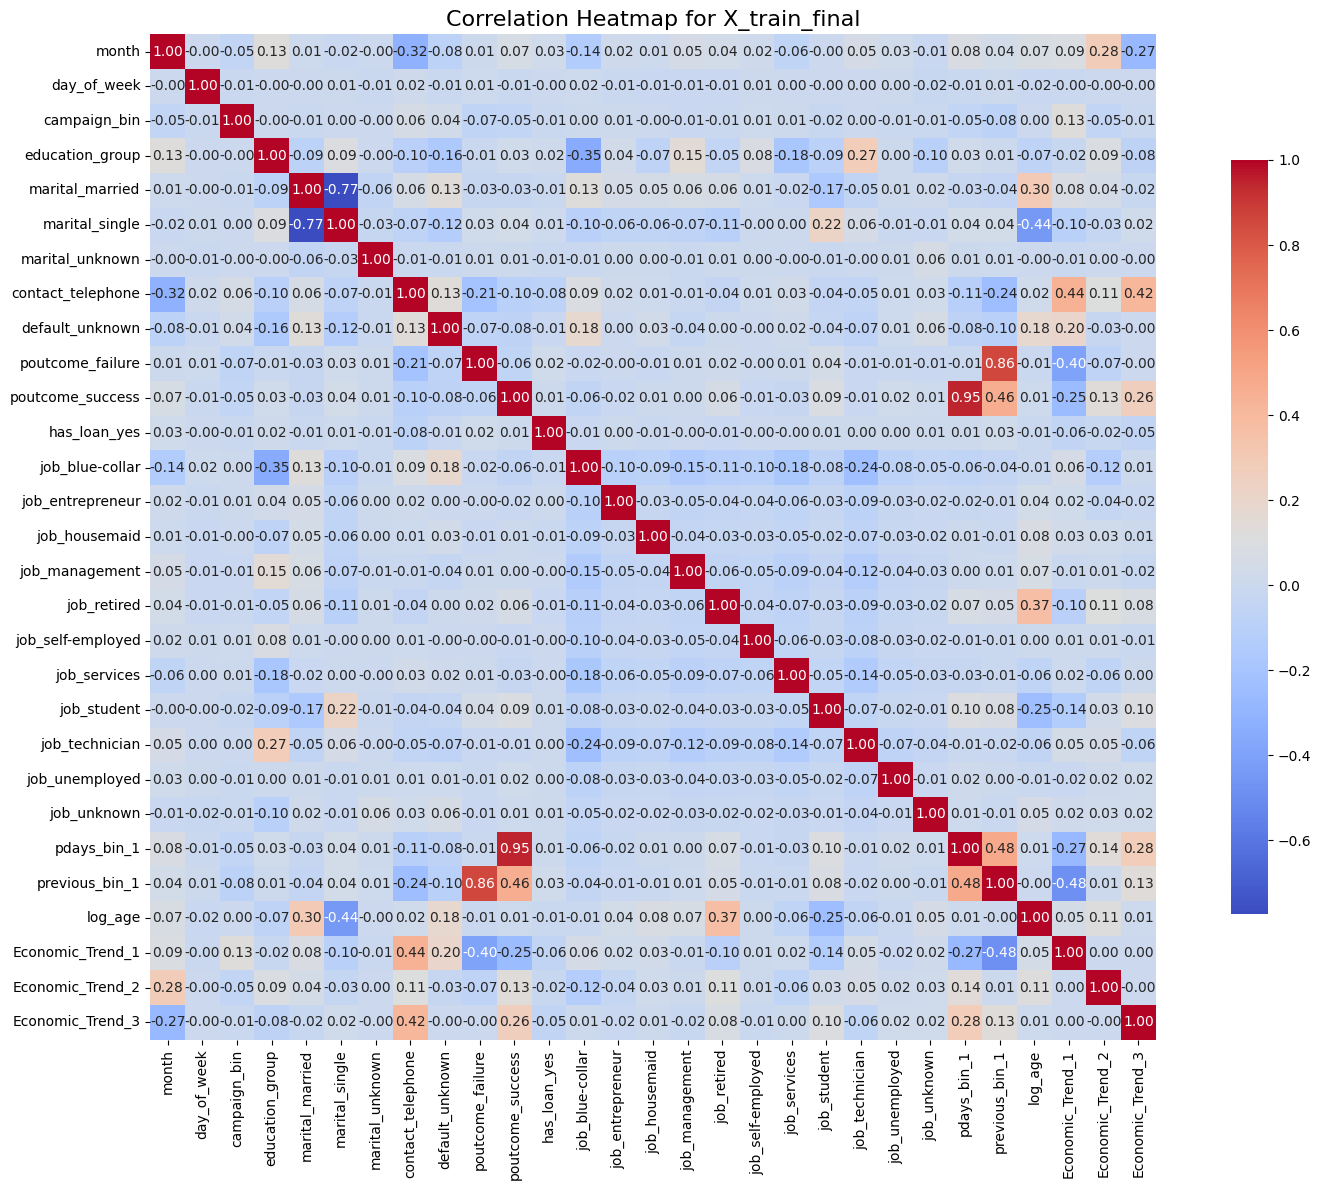

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = X_train_final.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16,12))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .75})

# Set the title
plt.title("Correlation Heatmap for X_train_final", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
# Drop high correlated poutcome_succes and poutcome_failure
X_train_final = X_train_final.drop(['poutcome_success', 'poutcome_failure'], axis=1)
X_val_final = X_val_final.drop(['poutcome_success', 'poutcome_failure'], axis=1)
X_test_final = X_test_final.drop(['poutcome_success', 'poutcome_failure'], axis=1)

---
## H. Modelling

### H. Logistic Regression

#### Fitting a  Logistic Regression Model


In [ ]:
print(X_train_final.shape)


(28826, 27)


In [ ]:
# Select bool columns
bool_cols_train = X_train_final.select_dtypes(include=['bool']).columns
bool_cols_val = X_val_final.select_dtypes(include=['bool']).columns
bool_cols_test = X_test_final.select_dtypes(include=['bool']).columns

# Convert bool to int
X_train_final[bool_cols_train] = X_train_final[bool_cols_train].astype(int)
X_val_final[bool_cols_train] = X_val_final[bool_cols_train].astype(int)
X_test_final[bool_cols_test] = X_test_final[bool_cols_test].astype(int)


In [ ]:
X_val_final.columns

Index(['month', 'day_of_week', 'campaign_bin', 'education_group',
       'marital_married', 'marital_single', 'marital_unknown',
       'contact_telephone', 'default_unknown', 'has_loan_yes',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'pdays_bin_1', 'previous_bin_1', 'log_age', 'Economic_Trend_1',
       'Economic_Trend_2', 'Economic_Trend_3'],
      dtype='object')

In [ ]:
X_val

,age,month,day_of_week,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign_bin,education_group,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,pdays_bin_1,previous_bin_1,log_age
30434,46,5,1,-1.8,92.893,-46.2,1.354,5099.1,2,1,...,False,False,False,False,True,False,False,True,True,3.850148
6256,50,5,2,1.1,93.994,-36.4,4.857,5191.0,1,1,...,False,False,False,False,False,False,False,False,False,3.931826
17067,42,7,5,1.4,93.918,-42.7,4.962,5228.1,2,2,...,False,False,False,False,False,False,False,False,False,3.761200
2664,51,5,3,1.1,93.994,-36.4,4.859,5191.0,1,1,...,False,False,False,False,False,False,False,False,False,3.951244
19488,48,8,4,1.4,93.444,-36.1,4.968,5228.1,0,1,...,False,False,False,False,False,False,False,False,False,3.891820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23148,38,8,2,1.4,93.444,-36.1,4.965,5228.1,2,2,...,False,False,False,False,False,False,False,False,False,3.663562
27504,35,11,5,-0.1,93.200,-42.0,4.021,5195.8,1,2,...,False,False,False,False,False,False,False,False,False,3.583519
36761,25,6,2,-2.9,92.963,-40.8,1.286,5076.2,2,0,...,False,False,False,False,False,False,False,False,False,3.258097
12585,36,7,1,1.4,93.918,-42.7,4.960,5228.1,2,1,...,False,False,False,False,True,False,False,False,False,3.610918


In [ ]:
import statsmodels.api as sm
import numpy as np

numeric_cols = ['campaign_bin', 'education_group', 'log_age' ,'Economic_Trend_1','Economic_Trend_2','Economic_Trend_3']
#  Fit scaler on training data
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_final[numeric_cols])

X_train_scaled = X_train_final.copy()
X_train_scaled.loc[:, numeric_cols] = X_train_num_scaled

#  Scale validation data using the same scaler
X_val_scaled = X_val_final.copy()
X_val_scaled.loc[:, numeric_cols] = scaler.transform(X_val_scaled[numeric_cols])

#  Scale test data similarly
X_test_scaled = X_test_final.copy()
X_test_scaled.loc[:, numeric_cols] = scaler.transform(X_test_scaled[numeric_cols])

# Now apply SMOTE only to the scaled training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)


# Add constant (intercept) to training and test features
X_train_sm = sm.add_constant(X_train_res)
X_val_sm = sm.add_constant(X_val_scaled)
X_test_sm = sm.add_constant(X_test_scaled)

# Fit logistic regression model
logit_model = sm.Logit(y_train_res, X_train_sm)
result = logit_model.fit()

# Print model summary
print(result.summary())

# Predict probabilities on test set
y_pred_prob = result.predict(X_test_sm)

# Convert probabilities to class labels (threshold 0.5)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Optional: Evaluate accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Optimization terminated successfully.
         Current function value: 0.479838
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                51160
Model:                          Logit   Df Residuals:                    51132
Method:                           MLE   Df Model:                           27
Date:                Tue, 03 Jun 2025   Pseudo R-squ.:                  0.3077
Time:                        00:01:11   Log-Likelihood:                -24549.
converged:                       True   LL-Null:                       -35461.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.3497      0.066     35.739      0.000       2.221       2.479
month   

#### Confusion matrix

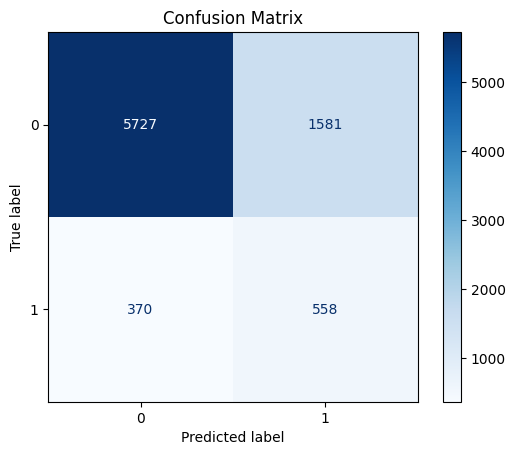

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


#### ROC curve

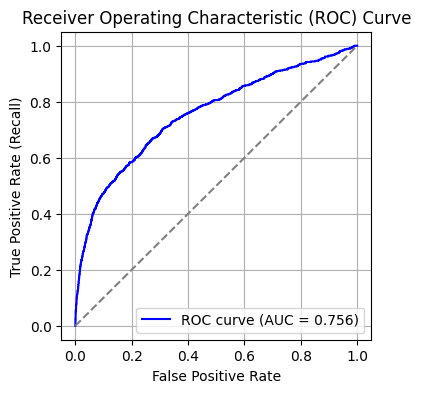

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# y_test: true labels
# y_pred_prob: predicted probabilities for the positive class from your model

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


#### Optimal Threshold

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
optimal_idx = np.argmax(tpr - fpr)  # Maximizing Sensitivity - Specificity
optimal_tau = thresholds[optimal_idx]
print(f"Optimal threshold: {optimal_tau:.2f}")

Optimal threshold: 0.45


#### Plot ROC Curve with Optimal Threshold (Youden's J)





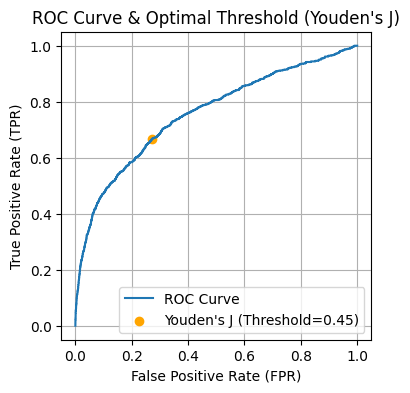

In [ ]:
# Plot ROC Curve with Optimal Threshold (Youden's J)
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, label="ROC Curve")
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='orange', label=f"Youden's J (Threshold={optimal_tau:.2f})")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve & Optimal Threshold (Youden's J)")
plt.legend()
plt.grid()
plt.show()

#### Logistic regression with optimal threshold

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.73      0.76     25580
           1       0.75      0.79      0.77     25580

    accuracy                           0.76     51160
   macro avg       0.76      0.76      0.76     51160
weighted avg       0.76      0.76      0.76     51160

Confusion Matrix:
 [[18790  6790]
 [ 5293 20287]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.73      0.82      7308
           1       0.24      0.67      0.35       928

    accuracy                           0.72      8236
   macro avg       0.59      0.70      0.59      8236
weighted avg       0.87      0.72      0.77      8236

Confusion Matrix:
 [[5328 1980]
 [ 309  619]]


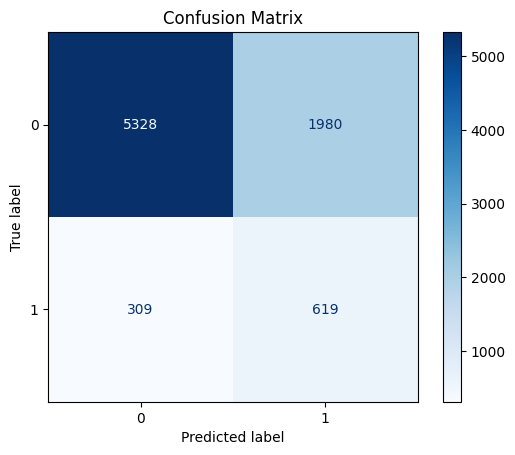

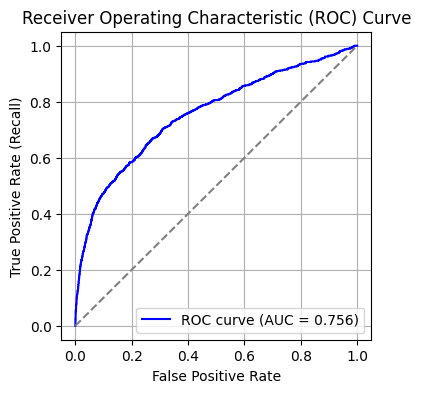

In [ ]:
import statsmodels.api as sm
import numpy as np

# Convert probabilities to class labels
y_pred = (y_pred_prob >= optimal_tau).astype(int)

# Evalue performance on train set
y_train_pred_prob = result.predict(X_train_sm)
y_train_pred = (y_train_pred_prob >= optimal_tau).astype(int)

print("Classification Report:\n", classification_report(y_train_res, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train_res, y_train_pred))


# Evaluate performance on test set
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### I. XGBoost

In [ ]:
# Month and day name maps
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

day_map = {
    0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri'
}


X_train_xgb = X_train_final.copy()
X_val_xgb = X_val_final.copy()
X_test_xgb = X_test_final.copy()

# Replace with string labels
X_train_xgb['month'] = X_train_xgb['month'].map(month_map)
X_val_xgb['month'] = X_val_xgb['month'].map(month_map)
X_test_xgb['month'] = X_test_xgb['month'].map(month_map)

X_train_xgb['day_of_week'] = X_train_xgb['day_of_week'].map(day_map)
X_val_xgb['day_of_week'] = X_val_xgb['day_of_week'].map(day_map)
X_test_xgb['day_of_week'] = X_test_xgb['day_of_week'].map(day_map)


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np


# ------------ Define Numeric Columns for Scaling ------------
numeric_cols = [ 'campaign_bin', 'education_group', 'log_age',
                'Economic_Trend_1', 'Economic_Trend_2', 'Economic_Trend_3']

# ------------ Scale the Data (Separately from LR) ------------
scaler = StandardScaler()

categorical_cols = ['month', 'day_of_week']
X_train_xgb = pd.get_dummies(X_train_xgb, columns=categorical_cols, drop_first=False)
X_val_xgb = pd.get_dummies(X_val_xgb, columns=categorical_cols, drop_first=False)
X_test_xgb = pd.get_dummies(X_test_xgb, columns=categorical_cols, drop_first=False)

# Fit scaler on training and apply to all
X_train_xgb[numeric_cols] = scaler.fit_transform(X_train_xgb[numeric_cols])
X_val_xgb[numeric_cols] = scaler.transform(X_val_xgb[numeric_cols])
X_test_xgb[numeric_cols] = scaler.transform(X_test_xgb[numeric_cols])

# ------------ Apply SMOTE ------------
smote = SMOTE(random_state=42)
X_train_xgb_smote, y_train_xgb_smote = smote.fit_resample(X_train_xgb, y_train)

# ------------ Convert to DMatrix ------------
dtrain_xgb = xgb.DMatrix(X_train_xgb_smote, label=y_train_xgb_smote)
dval_xgb = xgb.DMatrix(X_val_xgb, label=y_val)
dtest_xgb = xgb.DMatrix(X_test_xgb)

# ------------ Set XGBoost Parameters ------------
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'aucpr',
    'random_state': 42
}

# ------------ Train Model ------------
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain_xgb,
    num_boost_round=500,
    evals=[(dval_xgb, 'validation')],
    verbose_eval=False
)

# ------------ Evaluate on Train Set ------------
y_train_proba = xgb_model.predict(dtrain_xgb)
y_train_pred = np.where(y_train_proba >= 0.5, 1, 0)

print("\n======Classification Report on TRAIN set:======\n", classification_report(y_train_xgb_smote, y_train_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_train_xgb_smote, y_train_pred))

# ------------ Evaluate on Validation Set ------------
y_val_proba = xgb_model.predict(dval_xgb)
y_val_pred = np.where(y_val_proba >= 0.5, 1, 0)

print("\n======Classification Report on VAL set:======\n", classification_report(y_val, y_val_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))



======Classification Report on TRAIN set:======
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     25580
           1       0.99      0.95      0.97     25580

    accuracy                           0.97     51160
   macro avg       0.97      0.97      0.97     51160
weighted avg       0.97      0.97      0.97     51160


Confusion Matrix:
 [[25346   234]
 [ 1357 24223]]

======Classification Report on VAL set:======
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      3654
           1       0.47      0.38      0.42       464

    accuracy                           0.88      4118
   macro avg       0.70      0.66      0.68      4118
weighted avg       0.87      0.88      0.88      4118


Confusion Matrix:
 [[3457  197]
 [ 287  177]]


#### Tuning Hyperparameters

In [ ]:
import optuna
import xgboost as xgb
from sklearn.metrics import roc_auc_score

# ------------ Optuna Objective Function ------------
def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'aucpr',  # keep this or try 'logloss'
        'booster': 'gbtree',
        'tree_method': 'auto',
        'verbosity': 0,
        'max_depth': trial.suggest_int('max_depth', 3, 5),  # lower max_depth
        'min_child_weight': trial.suggest_int('min_child_weight', 5, 15),  # higher min_child_weight
        'gamma': trial.suggest_float('gamma', 5, 15),  # increase gamma
        'subsample': trial.suggest_float('subsample', 0.5, 0.85),  # lower subsample
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 0.85),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),  # smaller learning rate
        'lambda': trial.suggest_float('lambda', 1, 100),  # stronger L2 reg
        'alpha': trial.suggest_float('alpha', 1, 50),  # stronger L1 reg
        'early_stopping_rounds': trial.suggest_int('early_stopping_rounds', 1, 40),
        'max_delta_step': trial.suggest_int('max_delta_step', 1, 5),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 5),
        'random_state': 42
    }

    model = xgb.train(
        params=params,
        dtrain=dtrain_xgb,  # make sure you're using the SMOTEd, scaled train set
        num_boost_round=100,
        evals=[(dval_xgb, "eval")],
        early_stopping_rounds=1000,
        verbose_eval=False
    )

    preds_proba = model.predict(dval_xgb)
    return roc_auc_score(y_val, preds_proba)

# ------------ Run Study ------------
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# ------------ Print Best Result ------------
print("Best trial:")
best_trial = study.best_trial
print(f"  roc_auc_score: {best_trial.value:.4f}")
print("  Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")


[I 2025-06-03 00:28:26,064] A new study created in memory with name: no-name-8c90824e-5f3b-4f26-8e91-63f6aa92b709
[I 2025-06-03 00:28:31,606] Trial 0 finished with value: 0.7863772342071985 and parameters: {'max_depth': 3, 'min_child_weight': 11, 'gamma': 10.413629661186139, 'subsample': 0.5505006700701485, 'colsample_bytree': 0.7699483706558711, 'learning_rate': 0.015720022273318722, 'lambda': 24.69546639572968, 'alpha': 47.927346939555655, 'early_stopping_rounds': 38, 'max_delta_step': 5, 'scale_pos_weight': 1.9913417879369906}. Best is trial 0 with value: 0.7863772342071985.
[I 2025-06-03 00:28:34,045] Trial 1 finished with value: 0.7758756346375253 and parameters: {'max_depth': 4, 'min_child_weight': 10, 'gamma': 6.571560445851485, 'subsample': 0.5798244422729508, 'colsample_bytree': 0.7937452551287821, 'learning_rate': 0.08659770430047325, 'lambda': 75.32822115058876, 'alpha': 26.557919368065345, 'early_stopping_rounds': 22, 'max_delta_step': 1, 'scale_pos_weight': 2.1272370732606

Best trial:
  roc_auc_score: 0.7924
  Params: 
    max_depth: 4
    min_child_weight: 15
    gamma: 11.652306602520962
    subsample: 0.7479100395939966
    colsample_bytree: 0.501240485339099
    learning_rate: 0.022108007272472804
    lambda: 30.551460239323966
    alpha: 21.344595530742346
    early_stopping_rounds: 40
    max_delta_step: 3
    scale_pos_weight: 1.0855851778029644


#### Evaluate on val set

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# ------------ Retrieve Best Parameters ------------
best_params = study.best_trial.params
final_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'aucpr',
    'booster': 'gbtree',
    'tree_method': 'auto',
    'verbosity': 0,
    'random_state': 42,
    **best_params  # inject optimized values
}

best_iteration = study.best_trial.number  # This is the index of the best trial, not the best boosting round
num_rounds = 200  # Use a fixed or dynamic value, not based on trial number index
evals_result={}
# ------------ Retrain Final Model on Train Set ------------
final_model = xgb.train(
    params=final_params,
    dtrain=dtrain_xgb,
    num_boost_round=num_rounds,
    evals=[(dtrain_xgb, "train"), (dval_xgb, "eval")],
    verbose_eval=False,
    evals_result=evals_result
)


# ------------ Evaluate on Train Set ------------
y_train_proba = final_model.predict(dtrain_xgb)
y_train_pred = (y_train_proba >= 0.5).astype(int)

print("\n====== Classification Report on Train Set ======")
print(classification_report(y_train_xgb_smote, y_train_pred, zero_division=True))
print("Confusion Matrix:\n", confusion_matrix(y_train_xgb_smote, y_train_pred))

# ------------ Evaluate on Validation Set ------------
y_val_proba = final_model.predict(dval_xgb)
y_val_pred = (y_val_proba >= 0.5).astype(int)

print("\n====== Classification Report on Validation Set ======")
print(classification_report(y_val, y_val_pred, zero_division=True))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))



====== Classification Report on Train Set ======
              precision    recall  f1-score   support

           0       0.76      0.85      0.80     25580
           1       0.83      0.73      0.78     25580

    accuracy                           0.79     51160
   macro avg       0.79      0.79      0.79     51160
weighted avg       0.79      0.79      0.79     51160

Confusion Matrix:
 [[21708  3872]
 [ 6895 18685]]

====== Classification Report on Validation Set ======
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      3654
           1       0.33      0.63      0.44       464

    accuracy                           0.82      4118
   macro avg       0.64      0.74      0.66      4118
weighted avg       0.88      0.82      0.84      4118

Confusion Matrix:
 [[3071  583]
 [ 171  293]]


#### Optimal threshold

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, classification_report, confusion_matrix

# ---------------- Predict probabilities on validation set ----------------
y_val_proba = final_model.predict(dval_xgb)  # dval: validation DMatrix

# ---------------- Find optimal threshold  ----------------
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
optimal_idx = np.argmax(tpr - fpr)  # Maximizing Sensitivity - Specificity
optimal_tau = thresholds[optimal_idx]
print(f"Optimal threshold: {optimal_tau:.2f}")

# ---------------- Predict on train set using optimal threshold ----------------
y_train_proba = final_model.predict(dtrain_xgb)  # dtrain: train DMatrix
y_train_pred_optimal = (y_train_proba >= optimal_tau).astype(int)

# Evaluate performance on train set
print("\n====== Classification Report on Train Set ======")
print(classification_report(y_train_xgb_smote, y_train_pred_optimal))
print("Confusion Matrix:\n", confusion_matrix(y_train_xgb_smote, y_train_pred_optimal))

# ---------------- Predict on validation set using optimal threshold ----------------
y_val_pred_optimal = (y_val_proba >= optimal_tau).astype(int)

# Evaluate performance on validation set
print("\n====== Classification Report on Validation Set ======")
print(classification_report(y_val, y_val_pred_optimal))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_optimal))


Optimal threshold: 0.52

====== Classification Report on Train Set ======
              precision    recall  f1-score   support

           0       0.74      0.87      0.80     25580
           1       0.84      0.70      0.77     25580

    accuracy                           0.79     51160
   macro avg       0.79      0.79      0.78     51160
weighted avg       0.79      0.79      0.78     51160

Confusion Matrix:
 [[22271  3309]
 [ 7650 17930]]

====== Classification Report on Validation Set ======
              precision    recall  f1-score   support

           0       0.95      0.87      0.90      3654
           1       0.37      0.61      0.46       464

    accuracy                           0.84      4118
   macro avg       0.66      0.74      0.68      4118
weighted avg       0.88      0.84      0.85      4118

Confusion Matrix:
 [[3163  491]
 [ 180  284]]


In [ ]:
print(evals_result.keys())          # -> should show: dict_keys(['eval'])
print(evals_result['eval'].keys())  # -> e.g., dict_keys(['aucpr'])
print(evals_result['eval']['aucpr'])


dict_keys(['train', 'eval'])
odict_keys(['aucpr'])
[0.344926669851209, 0.38017870101640766, 0.381759682602596, 0.42564987354908007, 0.43067915311971083, 0.4384319529560505, 0.4394118604191784, 0.4407222470011133, 0.4372091373263215, 0.4348027805062563, 0.44406078532269855, 0.4479349653842432, 0.45035708798898605, 0.45016496002080747, 0.44460881765644195, 0.44487534162336223, 0.4467379341750548, 0.4469586105451314, 0.44704665741923033, 0.44784877154944086, 0.44708712718418653, 0.44381409267968674, 0.4436056840241873, 0.4458076506127309, 0.44665040115102667, 0.4484137919977553, 0.44626804337646336, 0.4455291396654805, 0.44578874606156077, 0.4450272309522389, 0.4440138572728951, 0.44456293404118924, 0.44547067968042653, 0.44616375170610634, 0.44661804714203523, 0.44698047286524994, 0.44656278659233933, 0.44643391601229654, 0.4460040228755375, 0.4460071651921764, 0.43613989632173455, 0.4358818564105481, 0.4359491839719587, 0.4371636143020383, 0.43773875457968486, 0.4382521697744366, 0.4385


====== Classification Report on TEST set: ======

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      7308
           1       0.39      0.64      0.48       928

    accuracy                           0.84      8236
   macro avg       0.67      0.75      0.69      8236
weighted avg       0.89      0.84      0.86      8236

Confusion Matrix:
[[6367  941]
 [ 336  592]]


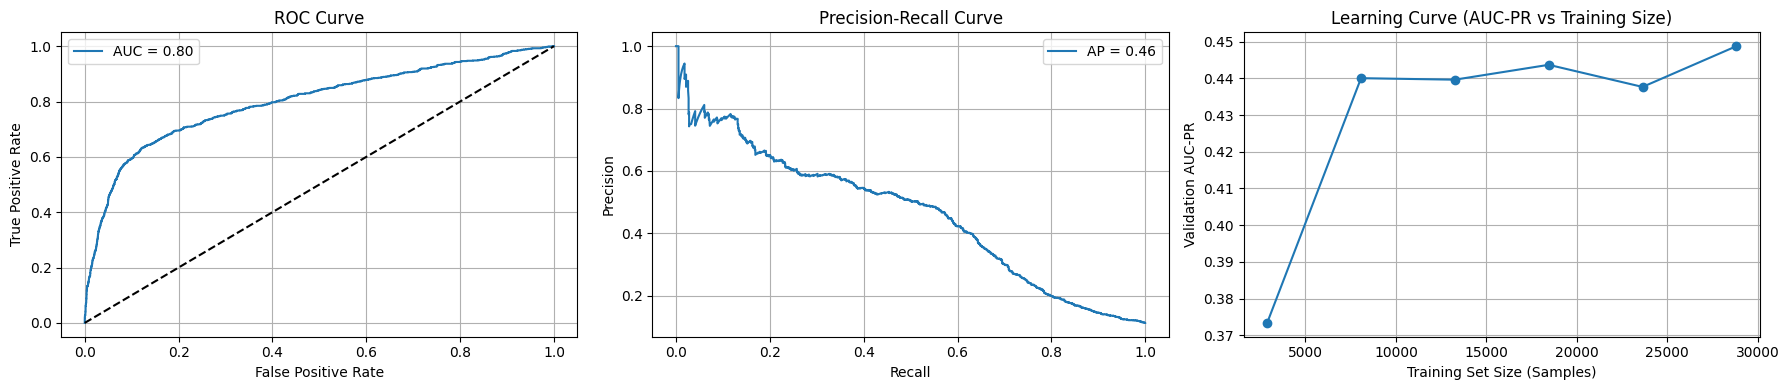

In [ ]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score
)
import matplotlib.pyplot as plt

# --------- Predict on TEST set ---------
y_test_proba = final_model.predict(dtest_xgb)
y_test_pred = (y_test_proba >= optimal_tau).astype(int)

# --------- Print Evaluation Metrics ---------
print("\n====== Classification Report on TEST set: ======\n")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# --------- ROC Curve ---------
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# --------- Precision-Recall Curve ---------
precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
ap_score = average_precision_score(y_test, y_test_proba)

# --------- PLOT ALL ---------
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# ROC
axes[0].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].set_title("ROC Curve")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].legend()
axes[0].grid(True)

# PR Curve
axes[1].plot(recall, precision, label=f"AP = {ap_score:.2f}")
axes[1].set_title("Precision-Recall Curve")
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")
axes[1].legend()
axes[1].grid(True)

# Learning Curve (AUC-PR)
train_sizes = np.linspace(0.1, 1.0, 6)
aucpr_scores = []
X_full = X_train_xgb  # Original, not SMOTEd
y_full = y_train
for frac in train_sizes:
    if frac < 1.0:
        X_sub, _, y_sub, _ = train_test_split(
            X_full, y_full, train_size=frac, stratify=y_full, random_state=42
        )
    else:
        X_sub = X_full
        y_sub = y_full
    X_sub, y_sub = SMOTE(random_state=42).fit_resample(X_sub, y_sub)
    dtrain_sub = xgb.DMatrix(X_sub, label=y_sub)
    model = xgb.train(
        params=final_params,
        dtrain=dtrain_sub,
        num_boost_round=200,
        evals=[(dval_xgb, 'eval')],
        verbose_eval=False
    )
    y_val_prob = model.predict(dval_xgb)
    aucpr = average_precision_score(y_val, y_val_prob)
    aucpr_scores.append(aucpr)

plt.plot((train_sizes * len(X_full)).astype(int), aucpr_scores, marker='o')
plt.xlabel("Training Set Size (Samples)")
plt.ylabel("Validation AUC-PR")
plt.title("Learning Curve (AUC-PR vs Training Size)")
plt.grid(True)
plt.tight_layout()
plt.show()


#### Feature importance

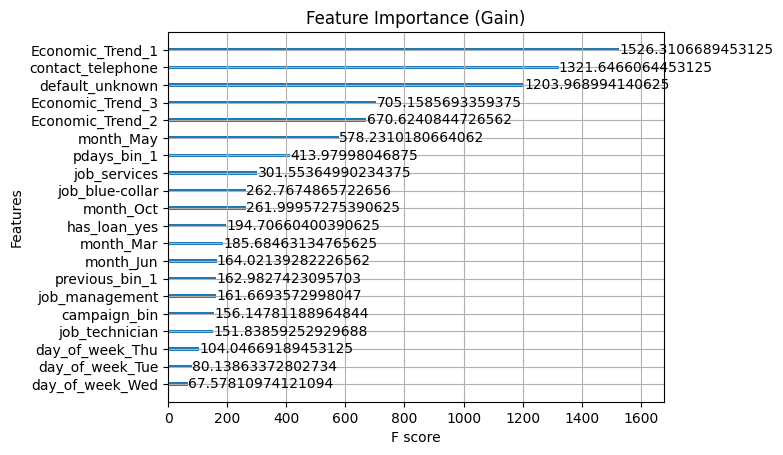

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt



# Plot importance based on 'gain' (recommended)
xgb.plot_importance(final_model, importance_type='gain', max_num_features=20)
plt.title("Feature Importance (Gain)")
plt.show()


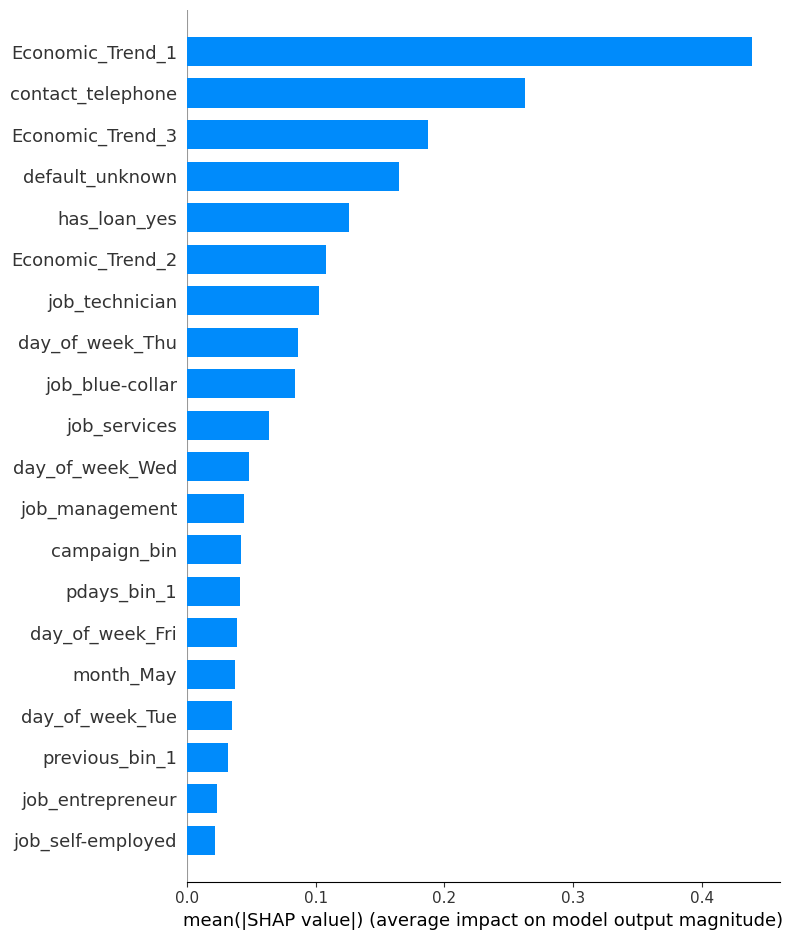

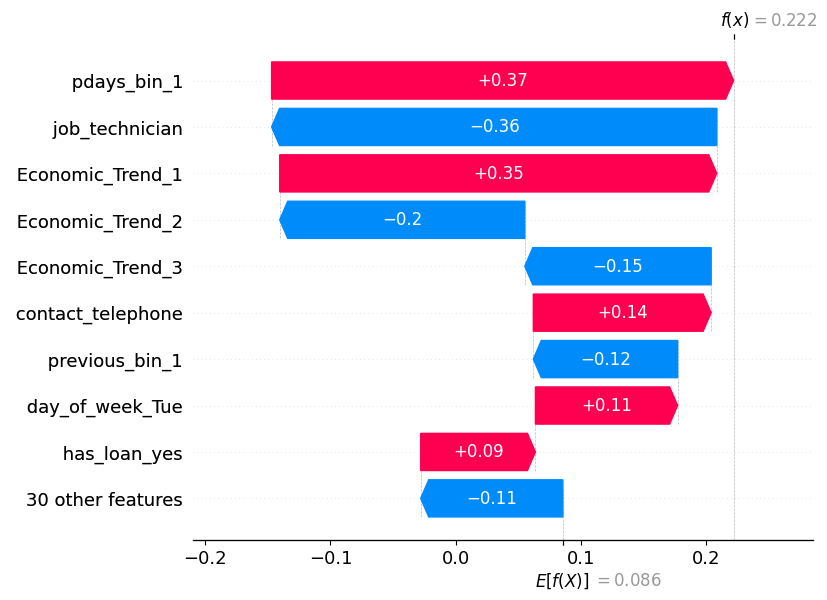

In [ ]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

# Ensure X_val is a pandas DataFrame with correct column names
X_val_df = X_val_xgb if isinstance(X_val_xgb, pd.DataFrame) else pd.DataFrame(X_val_xgb, columns=feature_names)

# Use TreeExplainer with the booster object
explainer = shap.TreeExplainer(final_model)  # final_model is a Booster from xgb.train

# Compute SHAP values
shap_values = explainer.shap_values(X_val_df)

# Global feature importance (bar plot)
shap.summary_plot(shap_values, X_val_df, plot_type="bar")

# Waterfall plot for the first prediction
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[0], X_val_df.iloc[0])
